# Tests

## Tests for sinuses

Below tests for sinuses functions (see [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.1). This functions met conditions of lemma 2(see [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

0 % is completed
4 % is completed
8 % is completed
12 % is completed
16 % is completed
20 % is completed
24 % is completed
28 % is completed
32 % is completed
36 % is completed
40 % is completed
44 % is completed
48 % is completed
52 % is completed
56 % is completed
60 % is completed
64 % is completed
68 % is completed
72 % is completed
76 % is completed
80 % is completed
84 % is completed
88 % is completed
92 % is completed
96 % is completed
100 % is completed


<IPython.core.display.Javascript object>


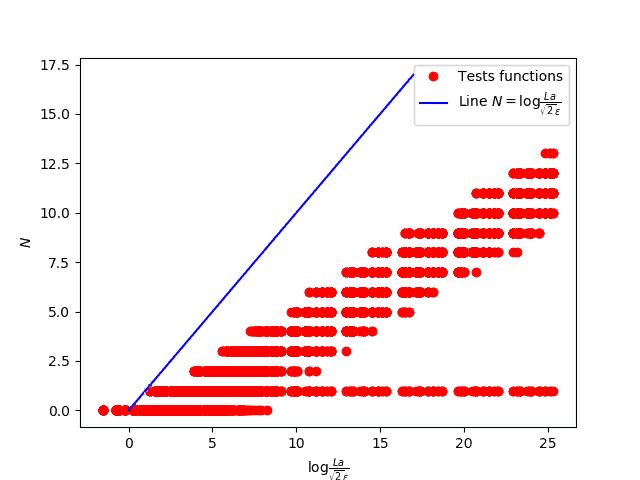

Text(0.5,0,'$\\log \\frac{La}{\\sqrt{2}\\epsilon}$')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from method_functions import method
from test_functions import sinuses
import math
%matplotlib notebook


results = []
epsilon = [0.1**(1 + i) for i in range(7)] + [0.5**(1 + i) for i in range(7)]
num = 0
for i in np.linspace(1.1, 1.9, 5).tolist():
    for j in np.linspace(1.1, 1.9, 5).tolist():
        print((num * 4), '% is completed')
        a = [[0.1, 0.1], [0.1, 0.1, 0.1]]
        m, n = 1, 2
        while m != -1:
            f = sinuses(a, [i, j])
            for eps in epsilon:
                N = method(f, eps, [0, 1, 0, 1])
                results.append((N[1], eps, N[2], f.L))
            m, n = 1, 2
            while m != -1 and a[m][n] == 1:
                a[m][n] = 0.1
                n = n - 1
                if n < 0:
                    m = m - 1
                    if m > 0:
                        n = 2
                    else:
                        n = 1
            a[max(m, 0)][n] *= 10
        num += 1
print('100 % is completed')
plt.plot([math.log(i[3] / i[1] / math.sqrt(2), 2) for i in results], [i[0] for i in results], 'ro')
plt.plot([0, 17], [0, 17], 'b')
plt.legend(('Tests functions', r'Line $N = \log \frac{La}{\sqrt{2}\epsilon}$'))
plt.ylabel(r'$N$')
plt.xlabel(r'$\log \frac{La}{\sqrt{2}\epsilon}$')

Results of this experiment met theoretical results for number of iterations (see Theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).